<a href="https://colab.research.google.com/github/pascal-maker/Python/blob/master/Labo_07_python_voor_data_science_Opdracht.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Labo 7 - Python voor data science
Het doel van dit labo is dat je kan:
 - filteren met meerdere condities.
 - kolommen toevoegen, verwijderen en bewerken.
 - zelf in de documentatie eenvoudige functies leren gebruiken.
 - kijken of de data normaalverdeeld is.
 - uitschieters opsporen en verwijderen uit een dataset.

Gegeven is het bestand 'movies.csv' die de IMDB 5000 dataset bevat. Deze dataset bevat gegevens (afkomstig van imdb.com) over meer dan 5000 films.
Gebruik Python met bijhorende libraries om de onderstaande vragen uit te werken en te beantwoorden.



Een beschrijving van de verschillende variabelen kan je hieronder vinden:

| Variable Name |Description |
| --- | --- |
|movie_title 	|Title of the Movie |
| duration |	Duration in minutes |
|director_name |	Name of the Director of the Movie|
|director_facebook_likes |	Number of likes of the Director on his Facebook Page|
|actor_1_name |	Primary actor starring in the movie|
|actor_1_facebook_likes |	Number of likes of the Actor_1 on his/her Facebook Page|
|actor_2_name 	|Other actor starring in the movie|
|actor_2_facebook_likes |	Number of likes of the Actor_2 on his/her Facebook Page|
|actor_3_name |	Other actor starring in the movie|
|actor_3_facebook_likes |	Number of likes of the Actor_3 on his/her Facebook Page|
|num_user_for_reviews |	Number of users who gave a review|
|num_critic_for_reviews |	Number of critical reviews on imdb|
|num_voted_users 	|Number of people who voted for the movie|
|cast_total_facebook_likes |	Total number of facebook likes of the entire cast of the movie|
|movie_facebook_likes |	Number of Facebook likes in the movie page|
|facenumber_in_poster |	Number of the actor who featured in the movie poster|
|color 	|Film colorization. ‘Black and White’ or ‘Color’|
|title_year 	| The year in which the movie is released (1916:2016)
|language |	English, Arabic, Chinese, French, German, Danish, Italian, Japanese etc|
|country |	Country where the movie is produced|
|content_rating |	Content rating of the movie|
|aspect_ratio |	Aspect ratio the movie was made in|
|gross |	Gross earnings of the movie in Dollars|
|budget |	Budget of the movie in Dollars|
|imdb_score |	IMDB Score of the movie on IMDB|
|genres |	Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’|


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

In [2]:
# Importeren van de dataset
dataset = pd.read_csv('movies.csv',sep=',')

In [3]:
# Toon de eerste 10 rijen
dataset.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Action
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Action
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Action
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,Action
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,Action
5,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,Action
6,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000,Adventure
7,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000,Action
8,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000,Adventure
9,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Henry Cavill,Batman v Superman: Dawn of Justice,371639,24450,Alan D. Purwin,0.0,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000,Action


Hoeveel films steken in de dataset?

In [4]:
dataset.shape[0]

3770

Hoeveel kolommen zijn er in de dataset?

In [5]:
dataset.shape[1]

26

Wat zijn deze kolommen?

In [6]:
print(dataset.columns)

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'actor_1_name', 'movie_title',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'genres'],
      dtype='object')


Gebruik de describe-functie om een overzicht te bekomen van de variabelen in de dataset. Bevat de dataset ontbrekende waarden of waarden die onrealistisch lijken?

In [7]:
dataset.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3.770000e+03,3.770000e+03,3770.000000,3770.000000,3770.000000,3.770000e+03,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000
mean,166.846419,110.221485,804.459682,769.151989,7724.785411,5.242427e+07,1.054415e+05,11489.983024,1.376393,335.670292,4.608673e+07,2003.009549,2015.390716,6.463873,2.111202,9330.752785
std,123.537036,22.631720,3062.831521,1891.113599,15496.630039,7.025551e+07,1.518841e+05,19096.558629,2.040899,410.916203,2.256040e+08,9.887261,4537.712194,1.057305,0.352764,21431.059266
min,1.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,2.200000e+01,0.000000,0.000000,1.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000
25%,77.000000,96.000000,11.000000,192.250000,744.250000,8.083416e+06,1.937225e+04,1906.000000,0.000000,109.000000,1.000000e+07,1999.000000,382.000000,5.900000,1.850000,0.000000
50%,138.000000,106.000000,63.000000,434.500000,1000.000000,3.001317e+07,5.355750e+04,4041.000000,1.000000,209.000000,2.500000e+07,2005.000000,683.000000,6.600000,2.350000,227.000000
75%,224.000000,120.000000,235.000000,690.000000,13000.000000,6.672026e+07,1.282162e+05,16228.750000,2.000000,398.000000,5.000000e+07,2010.000000,975.750000,7.200000,2.350000,11000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


*Toon* van alle kolommen hun datatypes.

In [12]:
print(dataset.dtypes)


color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
movie_facebook_likes           int64
genres                        object
dtype: object


Hoeveel van de films zijn in kleur? Stel dit visueel voor aan de hand van een gepaste plot.

<Axes: xlabel='color', ylabel='count'>

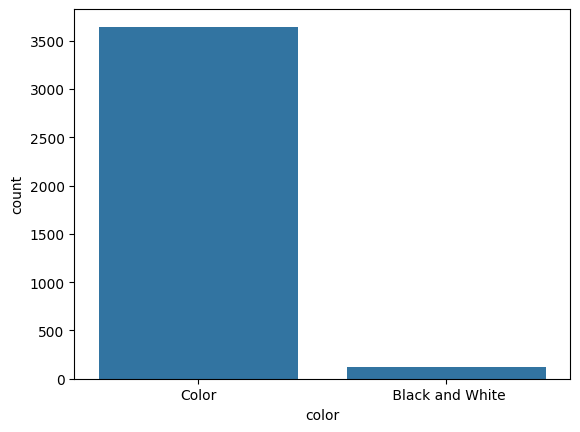

In [13]:
sns.countplot(x='color', data=dataset)

Hoeveel verschillende genres zijn er aanwezig in de dataset?

In [14]:
dataset['genres'].value_counts()

,count
genres,
Comedy,990
Action,960
Drama,675
Adventure,369
Crime,256
Biography,206
Horror,164
Animation,45
Fantasy,37


Visualiseer het aantal films per genre. Extra: lukt het jou om ze te sorteren van hoog naar laag?

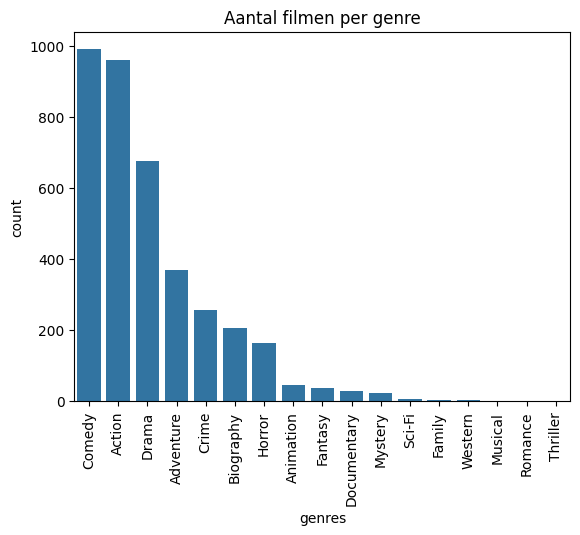

In [15]:
sns.countplot(x='genres',data = dataset, order = dataset['genres'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Aantal filmen per genre')
plt.show()

### **Wat deze code doet:**

1. **Telllen van Genres:**

   ```python
   dataset['genres'].value_counts().index
   ```

   * **Sorteren:** Bepaalt de volgorde van de genres op basis van hun frequentie (meest voorkomende eerst).
   * **Index:** Retourneert alleen de genre-namen, niet de aantallen.

2. **Visualiseren met Countplot:**

   ```python
   sns.countplot(x='genres', data=dataset, order=dataset['genres'].value_counts().index)
   ```

   * Maakt een **staafdiagram** (countplot) van het aantal films per genre.
   * De genres worden in aflopende volgorde geplaatst op basis van hun frequentie.

3. **Labels Draaien:**

   ```python
   plt.xticks(rotation=90)
   ```

   * Draait de genre-namen 90 graden zodat ze leesbaar blijven.

4. **Titel Toevoegen:**

   ```python
   plt.title('Aantal filmen per genre')
   ```

   * Geeft de grafiek een titel.

5. **Tonen van de Grafiek:**

   ```python
   plt.show()
   ```

   * Laat de grafiek zien.

---

### **Kortgezegd:**

Deze code maakt een **getelde staafdiagram** van de **genres** in een dataset, gesorteerd op frequentie, met gedraaide labels voor betere leesbaarheid. 😊


Wat is de hoogste imdb score die een film/aflevering heeft gehaald? Welke film/aflevering haalde deze score?

In [16]:
hoogste = dataset['imdb_score'].max()
print("Hoogste score: ", hoogste)
dataset[dataset['imdb_score']==hoogste]['movie_title']

Hoogste score:  9.3


,movie_title
1800,The Shawshank Redemption


### **Wat deze code doet:**

1. **Maximale Score Vinden:**

   ```python
   hoogste = dataset['imdb_score'].max()
   ```

   * Zoekt de **hoogste** IMDb-score in de kolom `'imdb_score'`.
   * Slaat dit op in de variabele `hoogste`.

2. **Score Afdrukken:**

   ```python
   print("Hoogste score: ", hoogste)
   ```

   * Print de **hoogste** score naar de console.

3. **Titel van de Hoogst Beoordeelde Film:**

   ```python
   dataset[dataset['imdb_score'] == hoogste]['movie_title']
   ```

   * Filtert het **dataset** naar rijen waar de `'imdb_score'` gelijk is aan de hoogste score.
   * Geeft alleen de **'movie\_title'** kolom terug voor deze rijen.
   * Dit resulteert in een lijst van filmnamen met de hoogste score.

---

### **Kort samengevat:**

* Zoek de **hoogste** IMDb-score.
* Print de **hoogste** score.
* Geef de **titel(s)** van de film(en) met die score terug. 😊


Wat is de laagste imdb score die een film/aflevering heeft gehaald? Welke film/aflevering haalde deze score?

In [17]:
laagste = dataset['imdb_score'].min()
print(laagste)
dataset[dataset['imdb_score']==laagste]['movie_title']

1.6


,movie_title
2546,Justin Bieber: Never Say Never


Welke is de langste film en welke is de kortste film?

In [19]:
langste = dataset['duration'].max()
print(langste)
print(dataset[dataset['duration'] == langste]['movie_title'].values[0])

330.0
Blood In, Blood Out 


### **Wat deze code doet:**

1. **Langste Filmduratie Vinden:**

   ```python
   langste = dataset['duration'].max()
   ```

   * Zoekt de **langste** duur (in minuten) uit de `'duration'` kolom.
   * Slaat deze waarde op in de variabele `langste`.

2. **Printen van de Langste Duur:**

   ```python
   print(langste)
   ```

   * Print de waarde van de **langste** duur naar de console.

3. **Titel van de Langste Film:**

   ```python
   print(dataset[dataset['duration'] == langste]['movie_title'].values[0])
   ```

   * Filtert het **dataset** op de rij(en) waar de `'duration'` gelijk is aan de langste waarde.
   * Haalt de **titel** van de langste film uit de `'movie_title'` kolom.
   * **`.values[0]`** converteert het resultaat naar een gewone tekststring (in plaats van een Pandas Series).

---

### **Kort samengevat:**

* **Zoekt** de langste filmduur.
* **Print** die duur.
* **Zoekt** de bijbehorende filmtitel en print die. 😊


In [20]:
# kortste
kortste = dataset['duration'].min()
print(kortste)
dataset[dataset['duration'] == kortste]['movie_title']

37.0


,movie_title
3343,Evil Dead II


Hoeveel films hebben een PG13-rating en hebben een imdb score hoger dan 8.5?

In [21]:
pg_13 = dataset['content_rating'] == 'PG-13'
hoge_score = dataset['imdb_score'] > 8.5
dataset[pg_13 & hoge_score].genres.count()

np.int64(7)

### **Wat deze code doet:**

1. **Filter voor PG-13:**

   ```python
   pg_13 = dataset['content_rating'] == 'PG-13'
   ```

   * Maakt een **booleaanse** serie die **True** is voor alle films met de content rating **'PG-13'**.

2. **Filter voor Hoge Score:**

   ```python
   hoge_score = dataset['imdb_score'] > 8.5
   ```

   * Maakt een **booleaanse** serie die **True** is voor alle films met een **IMDb-score hoger dan 8.5**.

3. **Combineren van Filters:**

   ```python
   dataset[pg_13 & hoge_score].genres.count()
   ```

   * **Filtert** het dataset op films die **PG-13** zijn **en** een score boven **8.5** hebben.
   * **Telt** het aantal rijen (films) die aan beide voorwaarden voldoen in de **'genres'** kolom.

---

### **Kort samengevat:**

* **Zoekt** naar films die **PG-13** zijn en een **IMDb-score** boven **8.5** hebben.
* **Telt** hoeveel van zulke films er zijn. 😊


Hoeveel franstalige films zijn komedies?

In [22]:
frans = dataset['language'] == 'French'
komedie = dataset['genres'] == 'Comedy'
dataset[frans & komedie].genres.count()

np.int64(12)

Wat is de maximale imdb score van een franstalige drama film? En hoelang duurde deze film?

In [23]:
drama = dataset['genres'] == 'Drama'
score = dataset[frans & drama]['imdb_score'].max()
print("Maximale imdb score: ",score)
dataset[frans & drama & (dataset['imdb_score'] == score)].duration

Maximale imdb score:  8.2


,duration
3070,139.0


### **Wat deze code doet:**

1. **Filter voor Drama Films:**

   ```python
   drama = dataset['genres'] == 'Drama'
   ```

   * Maakt een **booleaanse** serie die **True** is voor alle films met het genre **'Drama'**.

2. **Maximale Score voor Franse Drama's:**

   ```python
   score = dataset[frans & drama]['imdb_score'].max()
   ```

   * Filtert eerst het dataset op **Franse** **Drama** films (voorwaarde `frans & drama`).
   * Vindt de **hoogste** IMDb-score binnen deze subset.

3. **Printen van de Maximale Score:**

   ```python
   print("Maximale imdb score: ",score)
   ```

   * Print de gevonden **hoogste** score.

4. **Duur van de Hoogst Beoordeelde Franse Drama:**

   ```python
   dataset[frans & drama & (dataset['imdb_score'] == score)].duration
   ```

   * Filtert opnieuw op **Franse** **Drama** films, maar nu met de **maximale** IMDb-score.
   * Retourneert de **duur** van deze film(s).

---

### **Kort samengevat:**

* **Zoekt** naar de hoogste IMDb-score onder Franse drama's.
* **Print** die score.
* **Zoekt** vervolgens naar de duur van de film met die score. 😊


Verander de index van de dataframe van een getal naar de titel van de film. De documentatie van de te gebruiken functie kun je hier terug vinden: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html

In [24]:
dataset = dataset.set_index('movie_title')
dataset.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,886204,4834,Wes Studi,0.0,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Action
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,471220,48350,Jack Davenport,0.0,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Action
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,275868,11700,Stephanie Sigman,1.0,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Action
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,1144337,106759,Joseph Gordon-Levitt,0.0,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,Action
John Carter,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,212204,1873,Polly Walker,1.0,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,Action


### **Wat deze code doet:**

1. **Index Instellen:**

   ```python
   dataset = dataset.set_index('movie_title')
   ```

   * Verandert de **index** van het **DataFrame** naar de waarden uit de **'movie\_title'** kolom.
   * Hierdoor worden de **filmnamen** nu gebruikt als de rijlabels in plaats van de standaard numerieke index (0, 1, 2, ...).
   * Dit maakt het gemakkelijker om **films** direct op naam te zoeken of te filteren.

2. **Dataframe Bekijken:**

   ```python
   dataset.head()
   ```

   * Toont de **eerste 5 rijen** van het DataFrame met de nieuwe index.
   * Handig om te controleren of de index correct is ingesteld.

---

### **Voordelen van deze indexwijziging:**

* **Direct zoeken op titel:**

  ```python
  dataset.loc['Inception']
  ```
* **Snellere zoekacties:**

  * Indexen op unieke waarden (zoals filmtitels) zijn vaak sneller dan standaard numerieke indexen.
* **Duidelijkere DataFrame-weergave:**

  * Maakt je DataFrame overzichtelijker, vooral bij analyse op filmniveau.

---

Wil je dat ik je laat zien hoe je nu films makkelijk kunt filteren of selecteren met deze nieuwe index? 😊


Sorteer van hoge omzet naar lage omzet (gross variabele). Gebruik hiervoor de sort_values functie.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
Toon de top 10

In [25]:

dataset.sort_values(by=['gross']).head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,
Skin Trade,Color,Ekachai Uekrongtham,66.0,96.0,3.0,305.0,Mike Dopud,2000.0,162.0,Michael Jai White,5228,2802,Celina Jade,5.0,38.0,English,Thailand,R,9000000.0,2014.0,368.0,5.7,2.35,0,Action
The Jimmy Show,Color,Frank Whaley,9.0,96.0,436.0,4.0,Frank Whaley,474.0,703.0,Lynn Cohen,480,920,Heather Bucha,3.0,21.0,English,USA,R,1500000.0,2001.0,436.0,5.4,1.85,47,Comedy
In Her Line of Fire,Color,Brian Trenchard-Smith,8.0,88.0,53.0,176.0,Mariel Hemingway,563.0,721.0,David Keith,783,1284,Jesse Hutch,2.0,12.0,English,Germany,R,1000000.0,2006.0,288.0,4.1,1.85,42,Action
The Trials of Darryl Hunt,Color,Ricki Stern,11.0,106.0,15.0,0.0,Evelyn Jefferson,2.0,1111.0,Darryl Hunt,771,2,John Reeves,0.0,10.0,English,USA,PG-13,200000.0,2006.0,0.0,7.7,1.66,246,Crime
Detention of the Dead,Color,Alex Craig Mann,29.0,87.0,38.0,445.0,Christa B. Allen,552.0,1332.0,Justin Chon,2038,2251,Max Adler,6.0,20.0,English,USA,Not Rated,500000.0,2012.0,533.0,4.6,2.35,898,Comedy
The Ghastly Love of Johnny X,Black and White,Paul Bunnell,94.0,106.0,5.0,356.0,Kevin McCarthy,416.0,2436.0,Kate Maberly,344,1611,Paul Williams,2.0,19.0,English,USA,Not Rated,2000000.0,2012.0,403.0,5.7,2.35,655,Comedy
Locker 13,Color,Bruce Dellis,10.0,95.0,0.0,309.0,Ricky Schroder,685.0,2468.0,Tatyana Ali,241,2048,Jon Polito,3.0,5.0,English,USA,R,300000.0,2014.0,665.0,4.8,1.85,261,Thriller
I Love Your Work,Color,Adam Goldberg,22.0,111.0,1000.0,127.0,Marisa Coughlan,2000.0,2580.0,Judy Greer,1618,2564,Nicky Katt,2.0,40.0,English,USA,R,1650000.0,2003.0,163.0,5.4,2.35,63,Drama
Vamps,Color,Amy Heckerling,54.0,92.0,143.0,613.0,Justin Kirk,1000.0,2964.0,Taylor Negron,7444,3086,Ivan Sergei,2.0,42.0,English,USA,PG-13,16000000.0,2012.0,945.0,5.1,1.78,0,Comedy


Maak een histogram van het aantal films volgens de imdb score. Bereken hiervoor zelf de klassenbreedte en bepaal zelf de bins

In [26]:
maximum = dataset['imdb_score'].max()
print(maximum)
minimum = dataset['imdb_score'].min()
print(minimum)
klassenbreedte = (maximum - minimum) / np.sqrt(dataset.imdb_score.count())
bins = np.arange(start=minimum, stop = maximum+klassenbreedte, step=klassenbreedte)

9.3
1.6


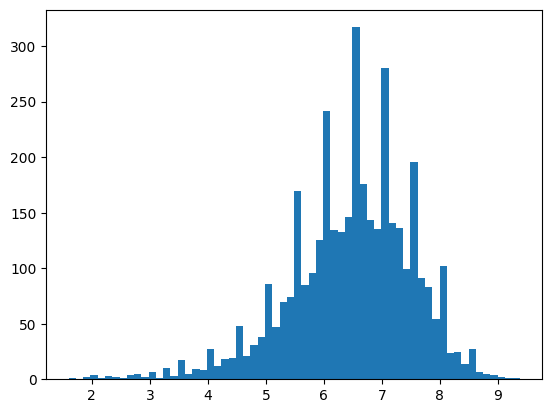

In [27]:
plt.hist(x='imdb_score', data=dataset, bins=bins)
plt.show()

Het aantal facebook likes blijkt voor de klant toch niet relevant te zijn, verwijder alle kolommen waar facebook_likes in voorkomt.

In [29]:
print(dataset.shape[1])
for c in dataset.columns:
  if 'facebook_likes' in c:
               dataset.drop(c, axis=1, inplace=True)
dataset.shape[1]

25


19

### **Wat deze code doet:**

1. **Aantal Kolommen Tellen (Voor het Verwijderen):**

   ```python
   print(dataset.shape[1])
   ```

   * Print het **aantal kolommen** in het DataFrame **voor** het verwijderen van de **facebook\_likes** kolommen.
   * **`.shape[1]`** geeft het aantal kolommen (tweede dimensie) van het DataFrame.

---

2. **Verwijderen van Kolommen met 'facebook\_likes':**

   ```python
   for c in dataset.columns:
       if 'facebook_likes' in c:
           dataset.drop(c, axis=1, inplace=True)
   ```

   * **Itereert** over elke kolomnaam in het DataFrame.
   * Controleert of **'facebook\_likes'** in de naam van de kolom voorkomt.
   * Verwijdert de kolom als dat het geval is (**axis=1** betekent kolom verwijderen).
   * **Inplace=True** zorgt ervoor dat de wijziging direct op het originele DataFrame wordt toegepast, zonder een kopie te maken.

---

3. **Aantal Kolommen Tellen (Na het Verwijderen):**

   ```python
   dataset.shape[1]
   ```

   * Geeft het **nieuwe** aantal kolommen na het verwijderen van de **facebook\_likes** kolommen.
   * Deze waarde wordt niet geprint, maar kan gebruikt worden voor verdere analyse.

---

### **Kort samengevat:**

* **Print** het aantal kolommen voor het verwijderen.
* **Verwijdert** alle kolommen met **'facebook\_likes'** in de naam.
* **Toont** het nieuwe aantal kolommen na de operatie. 😊


Momenteel staan de opbrengst (gross) en het budget nog in dollars, maar de klant zou dit graag in euro's weergeven willen zien. Bewerk de kolommen naar het gevraagde format (voeg niet een nieuwe kolom toe, maar bewerk rechtsreeks de kolom) (1 amerikaanse dollar = 0.86 euro)

In [30]:
dataset['gross'] = dataset.gross*0.86
dataset.budget = dataset.budget*0.86
dataset.head()

,color,director_name,num_critic_for_reviews,duration,actor_2_name,gross,actor_1_name,num_voted_users,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,aspect_ratio,genres
movie_title,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,Joel David Moore,6.540350e+08,CCH Pounder,886204,Wes Studi,0.0,3054.0,English,USA,PG-13,203820000.0,2009.0,7.9,1.78,Action
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,Orlando Bloom,2.660876e+08,Johnny Depp,471220,Jack Davenport,0.0,1238.0,English,USA,PG-13,258000000.0,2007.0,7.1,2.35,Action
Spectre,Color,Sam Mendes,602.0,148.0,Rory Kinnear,1.720638e+08,Christoph Waltz,275868,Stephanie Sigman,1.0,994.0,English,UK,PG-13,210700000.0,2015.0,6.8,2.35,Action
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,Christian Bale,3.853924e+08,Tom Hardy,1144337,Joseph Gordon-Levitt,0.0,2701.0,English,USA,PG-13,215000000.0,2012.0,8.5,2.35,Action
John Carter,Color,Andrew Stanton,462.0,132.0,Samantha Morton,6.283046e+07,Daryl Sabara,212204,Polly Walker,1.0,738.0,English,USA,PG-13,226782000.0,2012.0,6.6,2.35,Action


De hoeveelheid winst (of verlies) van een film is niet in de dataset te vinden maar valt eenvoudig te berekenen door van de opbrengst de kosten af te trekken. Met andere woorden: $gross-budget$. Deze berekende winst voegen we toe aan onze dataset als volgt: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.insert.html

In [31]:
# Nieuwe kolom 'profit' wordt op het einde toegevoegd
dataset['profit'] = dataset.gross - dataset.budget
dataset.head()
# dataset.insert(1,'profit',dataset.gross - dataset.budget)
# dataset.head()

,color,director_name,num_critic_for_reviews,duration,actor_2_name,gross,actor_1_name,num_voted_users,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,aspect_ratio,genres,profit
movie_title,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,Joel David Moore,6.540350e+08,CCH Pounder,886204,Wes Studi,0.0,3054.0,English,USA,PG-13,203820000.0,2009.0,7.9,1.78,Action,4.502150e+08
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,Orlando Bloom,2.660876e+08,Johnny Depp,471220,Jack Davenport,0.0,1238.0,English,USA,PG-13,258000000.0,2007.0,7.1,2.35,Action,8.087571e+06
Spectre,Color,Sam Mendes,602.0,148.0,Rory Kinnear,1.720638e+08,Christoph Waltz,275868,Stephanie Sigman,1.0,994.0,English,UK,PG-13,210700000.0,2015.0,6.8,2.35,Action,-3.863621e+07
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,Christian Bale,3.853924e+08,Tom Hardy,1144337,Joseph Gordon-Levitt,0.0,2701.0,English,USA,PG-13,215000000.0,2012.0,8.5,2.35,Action,1.703924e+08
John Carter,Color,Andrew Stanton,462.0,132.0,Samantha Morton,6.283046e+07,Daryl Sabara,212204,Polly Walker,1.0,738.0,English,USA,PG-13,226782000.0,2012.0,6.6,2.35,Action,-1.639515e+08


Welke is de meest verlieslatende film en welke de meest winstgevende?

In [32]:
meest = dataset['profit'].max()
print(dataset[dataset['profit'] == meest].profit)
minst = dataset['profit'].min()
print(dataset[dataset['profit'] == minst].profit)

movie_title
Avatar     4.502150e+08
Name: profit, dtype: float64
movie_title
The Host    -1.050344e+10
Name: profit, dtype: float64


Iemand beweert dat Sci-Fi films winstgevender zijn dan horror films. Klopt deze bewering? Gebruik de boxplot om je antwoord te staven.

<Axes: ylabel='profit'>

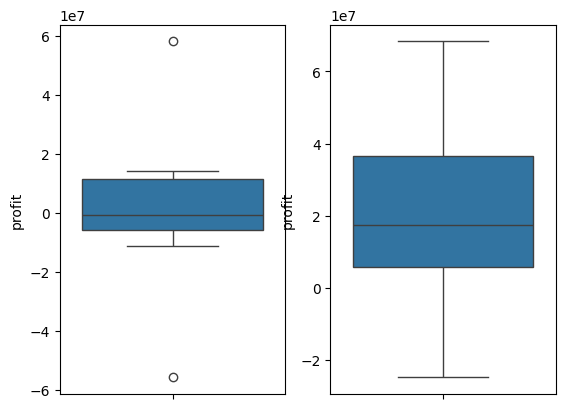

In [33]:
f, axes = plt.subplots(1, 2)
sns.boxplot(y='profit', data = dataset[dataset['genres']=='Sci-Fi'],whis = 1.5,ax=axes[0])
sns.boxplot(y='profit', data = dataset[dataset['genres']=='Fantasy'],whis = 1.5,ax=axes[1])

### **Wat deze code doet:**

1. **Subplot Aanmaken:**

   ```python
   f, axes = plt.subplots(1, 2)
   ```

   * Maakt een **figure** (`f`) met **twee subplots** naast elkaar (1 rij, 2 kolommen).
   * **`axes`** bevat de twee assen voor elk subplot.

---

2. **Boxplot voor Sci-Fi:**

   ```python
   sns.boxplot(y='profit', data=dataset[dataset['genres']=='Sci-Fi'], whis=1.5, ax=axes[0])
   ```

   * Maakt een **boxplot** voor **Sci-Fi** films.
   * **`whis=1.5`** bepaalt de uitbijtergrens (1.5 \* IQR).
   * Plaatst de plot op de **eerste** subplot (`axes[0]`).

---

3. **Boxplot voor Fantasy:**

   ```python
   sns.boxplot(y='profit', data=dataset[dataset['genres']=='Fantasy'], whis=1.5, ax=axes[1])
   ```

   * Maakt een **boxplot** voor **Fantasy** films.
   * Plaatst de plot op de **tweede** subplot (`axes[1]`).

---

4. **Weergave van de Grafiek:**

   * De twee boxplots worden naast elkaar weergegeven, zodat je **'profit'** van **Sci-Fi** en **Fantasy** films kunt vergelijken.

---

### **Kort samengevat:**

* **Maakt** twee subplots voor **profit** van **Sci-Fi** en **Fantasy** films.
* **Vergelijkt** de verdeling en uitbijters van deze twee genres. 😊


Is de winst normaalverdeeld?

450215028.41999996
-10503436785.68


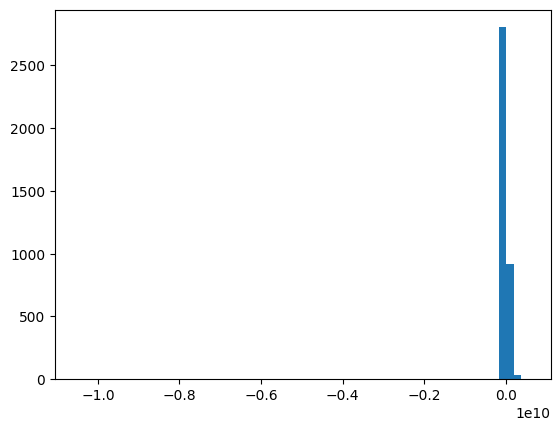

gemiddelde: 5450283.982546418
standaardafwijking: 197363667.8282441
percentage binnen 1 standaardafwijking: 98.75331564986737 %
percentage binnen 2 standaardafwijking: 99.6816976127321 %
percentage binnen 3 standaardafwijking: 99.76127320954907 %


In [35]:
maximum = dataset['profit'].max()
print(maximum)
minimum = dataset['profit'].min()
print(minimum)
klassenbreedte = (maximum - minimum) / np.sqrt(dataset.profit.count())
bins = np.arange(start=minimum, stop = maximum+klassenbreedte, step=klassenbreedte)
plt.hist(x='profit', data=dataset, bins=bins)
plt.show()
gemiddelde = dataset['profit'].mean()
stdafwijking = dataset['profit'].std()
print('gemiddelde:', gemiddelde)
print('standaardafwijking:', stdafwijking)
# percentage waarden binnen 1 standaardafwijking rond gemiddelde:
aantal_1_sigma = dataset[(dataset['profit']>(gemiddelde-stdafwijking)) & (dataset['profit']<(gemiddelde+stdafwijking))].profit.count()
print('percentage binnen 1 standaardafwijking:', aantal_1_sigma/dataset['profit'].count()*100,'%')
# percentage waarden binnen 2 standaardafwijkingen rond gemiddelde:
aantal_2_sigma = dataset[(dataset['profit']>(gemiddelde-2*stdafwijking)) & (dataset['profit']<(gemiddelde+2*stdafwijking))].profit.count()
print('percentage binnen 2 standaardafwijking:', aantal_2_sigma/dataset['profit'].count()*100,'%')
# percentage waarden binnen 3 standaardafwijkingen rond gemiddelde:
aantal_3_sigma = dataset[(dataset['profit']>(gemiddelde-3*stdafwijking)) & (dataset['profit']<(gemiddelde+3*stdafwijking))].profit.count()
print('percentage binnen 3 standaardafwijking:', aantal_3_sigma/dataset['profit'].count()*100,'%')

### **Wat deze code doet:**

---

1. **Maximale en Minimale Waarde van Winst:**

   ```python
   maximum = dataset['profit'].max()
   print(maximum)
   minimum = dataset['profit'].min()
   print(minimum)
   ```

   * Berekent en print de **maximale** en **minimale** **winst** uit de **'profit'** kolom.

---

2. **Klassenbreedte Bepalen voor Histogram:**

   ```python
   klassenbreedte = (maximum - minimum) / np.sqrt(dataset.profit.count())
   ```

   * Bereken de **klassenbreedte** op basis van de **Sturges-regel** voor een histogram.
   * Zorgt voor een geschikte indeling van de winstwaarden in bins.

---

3. **Histogram Plotten:**

   ```python
   bins = np.arange(start=minimum, stop=maximum+klassenbreedte, step=klassenbreedte)
   plt.hist(x='profit', data=dataset, bins=bins)
   plt.show()
   ```

   * Maakt een histogram van de **winstwaarden** met de berekende **klassenbreedte**.
   * Visualiseert de verdeling van **'profit'** in de dataset.

---

4. **Gemiddelde en Standaardafwijking:**

   ```python
   gemiddelde = dataset['profit'].mean()
   stdafwijking = dataset['profit'].std()
   print('gemiddelde:', gemiddelde)
   print('standaardafwijking:', stdafwijking)
   ```

   * Berekent en print de **gemiddelde** winst en de **standaardafwijking**.

---

5. **Percentage Waarden binnen Sigma-Intervallen:**

   * **Binnen 1 Standaardafwijking:**

     ```python
     aantal_1_sigma = dataset[(dataset['profit']>(gemiddelde-stdafwijking)) &
                              (dataset['profit']<(gemiddelde+stdafwijking))].profit.count()
     print('percentage binnen 1 standaardafwijking:', aantal_1_sigma/dataset['profit'].count()*100,'%')
     ```
   * **Binnen 2 Standaardafwijkingen:**

     ```python
     aantal_2_sigma = dataset[(dataset['profit']>(gemiddelde-2*stdafwijking)) &
                              (dataset['profit']<(gemiddelde+2*stdafwijking))].profit.count()
     print('percentage binnen 2 standaardafwijking:', aantal_2_sigma/dataset['profit'].count()*100,'%')
     ```
   * **Binnen 3 Standaardafwijkingen:**

     ```python
     aantal_3_sigma = dataset[(dataset['profit']>(gemiddelde-3*stdafwijking)) &
                              (dataset['profit']<(gemiddelde+3*stdafwijking))].profit.count()
     print('percentage binnen 3 standaardafwijking:', aantal_3_sigma/dataset['profit'].count()*100,'%')
     ```
   * **Tel het aantal winstwaarden** binnen **1, 2 en 3** standaardafwijkingen rond het gemiddelde.
   * **Print** de percentages van deze waarden, wat nuttig is voor het controleren van een **normale verdeling** (68-95-99.7 regel).

---

### **Kort samengevat:**

* **Berekent** het bereik en de spreiding van de winst.
* **Plot** de verdeling met een histogram.
* **Controleert** hoeveel van de waarden binnen **1, 2 en 3** standaardafwijkingen vallen. 😊


Bepaal de uitschieters bij de winst. Welke film brachten een extreem grote winst met zich mee en welke een extreem groot verlies?
Bereken de uitschieters op twee mogelijke manieren:
1. Via de interkwartielafstand: uitschieters zijn waarden die groter zijn dan Q3 + 1,5 keer de interkwartielafstand of kleiner zijn dan Q1- 1,5 keer de interkwartielafstand.
2. Via de standaardafwijking: waarden die meer dan 3 standaardafwijken van het gemiddelde gelegen zijn. Dus waarden groter dan gemiddelde + 3 keer de std.afw en waarden kleiner dan het gemiddelde - 3 keer de standaardafwijking.

In [36]:
# Uitschieters via kwartielen
# Uitschieters via kwartielen
Q1 = dataset['profit'].quantile(0.25)
Q3 = dataset['profit'].quantile(0.75)
IKA = Q3-Q1
upper_limit = Q3+1.5*IKA
lower_limit = Q1-1.5*IKA
outliers = dataset[(dataset['profit']<lower_limit) | (dataset['profit']>upper_limit)]
outliers.head()

,color,director_name,num_critic_for_reviews,duration,actor_2_name,gross,actor_1_name,num_voted_users,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,aspect_ratio,genres,profit
movie_title,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,Joel David Moore,6.540350e+08,CCH Pounder,886204,Wes Studi,0.0,3054.0,English,USA,PG-13,203820000.0,2009.0,7.9,1.78,Action,4.502150e+08
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,Christian Bale,3.853924e+08,Tom Hardy,1144337,Joseph Gordon-Levitt,0.0,2701.0,English,USA,PG-13,215000000.0,2012.0,8.5,2.35,Action,1.703924e+08
John Carter,Color,Andrew Stanton,462.0,132.0,Samantha Morton,6.283046e+07,Daryl Sabara,212204,Polly Walker,1.0,738.0,English,USA,PG-13,226782000.0,2012.0,6.6,2.35,Action,-1.639515e+08
Avengers: Age of Ultron,Color,Joss Whedon,635.0,141.0,Robert Downey Jr.,3.947328e+08,Chris Hemsworth,462669,Scarlett Johansson,4.0,1117.0,English,USA,PG-13,215000000.0,2015.0,7.5,2.35,Action,1.797328e+08
Batman v Superman: Dawn of Justice,Color,Zack Snyder,673.0,183.0,Lauren Cohan,2.840142e+08,Henry Cavill,371639,Alan D. Purwin,0.0,3018.0,English,USA,PG-13,215000000.0,2016.0,6.9,2.35,Action,6.901419e+07


### **Wat deze code doet:**

1. **Bepalen van de Quartielen:**

   ```python
   Q1 = dataset['profit'].quantile(0.25)
   Q3 = dataset['profit'].quantile(0.75)
   ```

   * **Q1 (25e percentiel)**: Het punt waar **25%** van de data onder ligt.
   * **Q3 (75e percentiel)**: Het punt waar **75%** van de data onder ligt.

---

2. **Interkwartielafstand (IKA) Berekenen:**

   ```python
   IKA = Q3 - Q1
   ```

   * De **interkwartielafstand** is het **verschil** tussen **Q3** en **Q1**.
   * Geeft de **spreiding** van de **middelste 50%** van de data aan.

---

3. **Bovengrens en Ondergrens voor Uitbijters:**

   ```python
   upper_limit = Q3 + 1.5 * IKA
   lower_limit = Q1 - 1.5 * IKA
   ```

   * **Bovengrens**: Waarden **groter dan Q3 + 1.5\*IKA** worden als **uitbijters** beschouwd.
   * **Ondergrens**: Waarden **kleiner dan Q1 - 1.5\*IKA** worden ook als **uitbijters** beschouwd.

---

4. **Filteren van Uitbijters:**

   ```python
   outliers = dataset[(dataset['profit'] < lower_limit) | (dataset['profit'] > upper_limit)]
   ```

   * Filtert alle rijen met **'profit'** buiten de berekende grenzen.
   * **|** betekent **"of"** (dus **lager dan de ondergrens** **of** **hoger dan de bovengrens**).

---

5. **Eerste Vijf Uitbijters Bekijken:**

   ```python
   outliers.head()
   ```

   * Toont de **eerste 5 uitbijters** in de dataset voor snelle inspectie.

---

### **Kort samengevat:**

* **Identificeert** uitbijters in de **'profit'** kolom op basis van de **IQR-methode**.
* **Filtert** de rijen die buiten deze grenzen vallen.
* **Toont** de eerste paar uitbijters voor controle. 😊


In [ ]:
# Uitschieters via standaardafwijking


Verwijder de uitschieters gevonden via de standaardafwijking uit de dataset.

In [37]:
# Uitschieters via standaardafwijking
average = dataset['profit'].mean()
stdafwijking = dataset['profit'].std()
upper_limit = average + 3*stdafwijking
lower_limit = average - 3*stdafwijking
outliers = dataset[(dataset['profit']<lower_limit) | (dataset['profit']>upper_limit)]
outliers.head()

,color,director_name,num_critic_for_reviews,duration,actor_2_name,gross,actor_1_name,num_voted_users,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,aspect_ratio,genres,profit
movie_title,,,,,,,,,,,,,,,,,,,,
Princess Mononoke,Color,Hayao Miyazaki,174.0,134.0,Jada Pinkett Smith,1976444.26,Minnie Driver,221552,Billy Crudup,0.0,570.0,Japanese,Japan,PG-13,2.064000e+09,1997.0,8.4,1.85,Adventure,-2.062024e+09
Steamboy,Color,Katsuhiro Ôtomo,105.0,103.0,Robin Atkin Downes,352933.68,William Hootkins,13727,Rosalind Ayres,1.0,79.0,Japanese,Japan,PG-13,1.829667e+09,2004.0,6.9,1.85,Action,-1.829314e+09
The Host,Color,Joon-ho Bong,363.0,110.0,Kang-ho Song,1893214.32,Doona Bae,68883,Ah-sung Ko,0.0,279.0,Korean,South Korea,R,1.050533e+10,2006.0,7.0,1.85,Comedy,-1.050344e+10
Fateless,Color,Lajos Koltai,73.0,134.0,Péter Fancsikai,168463.68,Marcell Nagy,5603,Bálint Péntek,0.0,45.0,Hungarian,Hungary,R,2.150000e+09,2005.0,7.1,2.35,Drama,-2.149832e+09
Kabhi Alvida Naa Kehna,Color,Karan Johar,20.0,193.0,John Abraham,2816880.98,Shah Rukh Khan,13998,Preity Zinta,2.0,264.0,Hindi,India,R,6.020000e+08,2006.0,6.0,2.35,Drama,-5.991831e+08


In [38]:
# prompt: #verwijder uitschietes vai stadnaardafwijking

dataset_no_outliers_std = dataset[(dataset['profit'] >= lower_limit) & (dataset['profit'] <= upper_limit)].copy()

# Optioneel: Controleer de shape van de nieuwe dataset om te zien hoeveel rijen zijn verwijderd
print("Original dataset shape:", dataset.shape)
print("Dataset without std deviation outliers shape:", dataset_no_outliers_std.shape)

Original dataset shape: (3770, 20)
Dataset without std deviation outliers shape: (3761, 20)


### **Wat deze code doet:**

---

1. **Verwijderen van Uitbijters:**

   ```python
   dataset_no_outliers_std = dataset[(dataset['profit'] >= lower_limit) & (dataset['profit'] <= upper_limit)].copy()
   ```

   * **Filtert** het **dataset** om **uitschieters** te verwijderen.
   * Behoudt alleen rijen waarvan de **'profit'** binnen de **berekende grenzen** (lower\_limit en upper\_limit) valt.
   * **`.copy()`** maakt een **kopie** om te voorkomen dat wijzigingen het originele DataFrame beïnvloeden.

---

2. **Controle van de Dataset Groottes:**

   ```python
   print("Original dataset shape:", dataset.shape)
   print("Dataset without std deviation outliers shape:", dataset_no_outliers_std.shape)
   ```

   * Print de **vorm** (aantal rijen en kolommen) van de **originele** en de **gefilterde** datasets.
   * Laat je zien hoeveel rijen (uitbijters) verwijderd zijn.

---

### **Kort samengevat:**

* **Verwijdert** uitschieters op basis van **IQR-methode** (niet standaarddeviatie, ondanks de comment).
* **Print** de omvang van beide datasets om het effect van het filter te controleren. 😊
